In [4]:
%matplotlib inline
import datetime  # For datetime objects
from Providers.lim import fetch_contract, COLUMN_NAMES
import pandas as pd
import pytz
from numpy import log
df = fetch_contract('CL_2015Z', COLUMN_NAMES, '2013-01-01', '2015-01-01')
df.index = df.index.tz_localize(pytz.utc)
returns = log(df["close"].shift(1) / df["close"])
returns = returns[50:]
benchmark = log(df["high"].shift(1) / df["high"])
returns = returns.dropna()
benchmark = benchmark.dropna()

Entire data start date: 2013-03-15
Entire data end date: 2014-12-31


Out-of-Sample Months: 16
Backtest Months: 5


Performance statistics,All history,Backtest,Out of sample
annual_return,0.22,-0.01,0.31
cum_returns_final,0.43,-0.01,0.44
annual_volatility,0.15,0.12,0.16
sharpe_ratio,1.42,-0.06,1.81
calmar_ratio,1.59,-0.23,2.28
stability_of_timeseries,0.09,0.06,0.15
max_drawdown,-0.14,-0.06,-0.14
omega_ratio,1.35,0.99,1.48
sortino_ratio,2.65,-0.11,3.48
skew,2.35,1.15,2.42


Worst drawdown periods,net drawdown in %,peak date,valley date,recovery date,duration
0,13.79,2014-01-13,2014-07-01,2014-10-14,197
1,6.29,2013-04-18,2013-10-14,2014-01-08,190
2,5.62,2014-12-18,2014-12-23,NaT,NaN
3,3.57,2014-11-28,2014-12-01,2014-12-05,6
4,2.74,2014-10-22,2014-10-29,2014-11-04,10




[-0.018 -0.04 ]


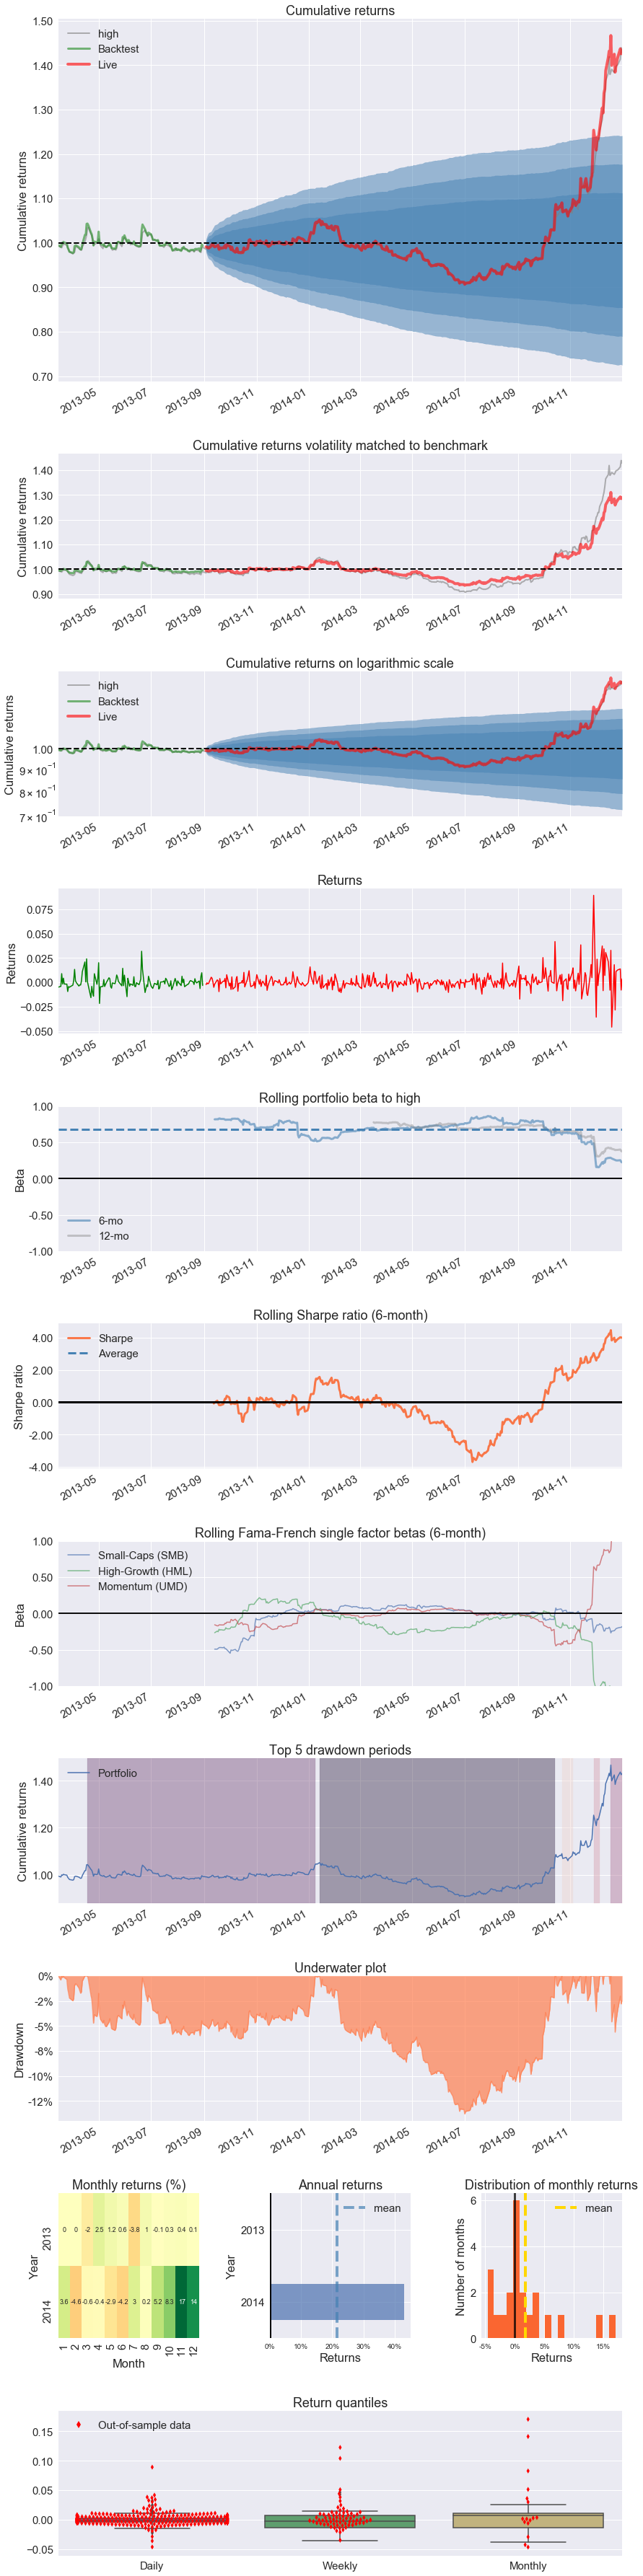

In [5]:
import pyfolio as pf
ts = pf.create_returns_tear_sheet(returns, benchmark_rets=benchmark,live_start_date='2013-9-1')

Running T model
Optimization terminated successfully.
         Current function value: -1537.105935
         Iterations: 3
         Function evaluations: 119


100%|█████████▉| 2498/2500 [04:17<00:00,  8.54it/s]C:\Users\nthoun\AppData\Local\conda\conda\envs\trading\lib\site-packages\pymc3\step_methods\hmc\nuts.py:465: UserWarning: Chain 0 reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
  'reparameterize.' % self._chain_id)
100%|██████████| 2000/2000 [00:02<00:00, 773.69it/s]



Finished T model (required 413.78 seconds).

Running BEST model


100%|██████████| 2500/2500 [00:15<00:00, 161.01it/s]



Finished BEST model (required 57.49 seconds).

Finished plotting Bayesian cone (required 0.11 seconds).


C:\Users\nthoun\AppData\Local\conda\conda\envs\trading\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "



Finished plotting BEST results (required 0.89 seconds).

Finished computing Bayesian predictions (required 0.13 seconds).

Finished plotting Bayesian VaRs estimate (required 0.05 seconds).

Running alpha beta model
Optimization terminated successfully.
         Current function value: -1620.205035
         Iterations: 4
         Function evaluations: 198


100%|██████████| 2500/2500 [06:26<00:00,  4.50it/s]C:\Users\nthoun\AppData\Local\conda\conda\envs\trading\lib\site-packages\pymc3\step_methods\hmc\nuts.py:465: UserWarning: Chain 0 reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
  'reparameterize.' % self._chain_id)




Finished running alpha beta model (required 443.02 seconds).

Finished plotting alpha beta model (required 0.17 seconds).

Total runtime was 915.64 seconds.


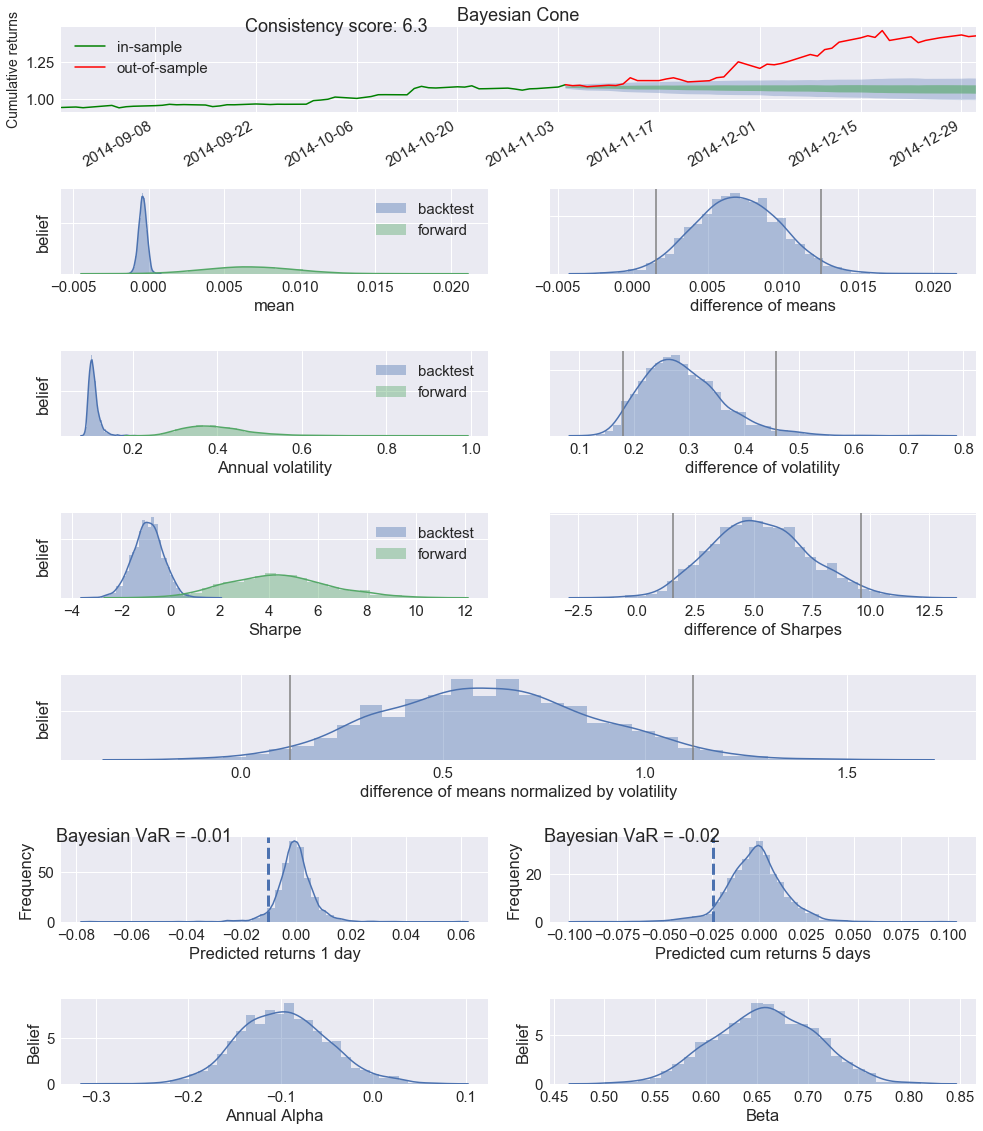

In [6]:
pf.create_bayesian_tear_sheet(returns, benchmark_rets=benchmark, live_start_date=returns.index[-40])

In [20]:
from pyfolio import timeseries
from pyfolio.utils import APPROX_BDAYS_PER_MONTH
from pyfolio import tears
from pyfolio import bayesian

stock_rets = returns
rolling_window = 20
rolling_beta = timeseries.rolling_fama_french(
    stock_rets,
    rolling_window=rolling_window)

In [21]:
len(rolling_beta.dropna())

434

In [22]:
rolling_beta.shape

(454, 3)

In [25]:
ok = bayesian.model_returns_t_alpha_beta(stock_rets, rolling_beta, samples=10, benchmark_rets=benchmark)

TypeError: model_returns_t_alpha_beta() got an unexpected keyword argument 'benchmark_rets'